# Problem 1

## Barabasi-Albert model with constant term in the attachment probability

We consider the Barabasi-Albert preferential attachment model with a slight difference in the probability of attachment for a new node coming at time $t$ to node $v$: it will be proportional to 

$$ \frac{d_v + C}{(t-1)(2L + C)} $$

where $ C \geq -L $ and $L$ is the fixed number of edges that a node has when it arrives: for $C = 0$ we are back in the usual setting. This adjustment allows us to model more expressively real networks, since in the end we should find a functional form for the degree distribution proportional to $k ^{-(3+\frac{C}{L})}$.

To show this, we proceed like we did in the vanilla Barabasi-Albert model, approximating the probability for a node of degree $k$ to increase its degree by one at time $t$ with 

$$ \frac{L(k+C)}{t(2L + C)} $$

the underlying assumption in this approximation is that it is unlikely for a node to get more than one edge, which is true with high probability in regime. 

Given this we can compute the number of nodes whose degree is $k$ as we did in the rate equation approach we used to determine the degree distribution of Barabasi-Albert model. 

So we have: 

$$
n_k(t +1) = \begin{cases}
    0 & \text{if } & k < L \\ 
    n_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + 1 & \text{if} & k = L \\
    n_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + n_{k-1}(t)\frac{L(k-1+C)}{t(2L+C)}& \text{if} & k > L
\end{cases}
$$

Some comments on this: 
+ There are no node whose degree is less than $L$ by design;
+ The approximate probability of increasing the degree by one gives us on average the proportion of nodes that increases their degree in the subsequent timestamp;
+ This means that the population of nodes $n_k(t)$ is decreased proportionally to $\frac{L(k+C)}{t(2L + C)}$, because it is the ratio of nodes whose degree becomes $k+1$, but also increased proportionally to $\frac{L(k-1+C)}{t(2L + C)}$, being the ratio of nodes whose degree jumps from $k-1$ to $k$.

In terms of probabilities $p_k(t) = \frac{n_k(t)}{t}$ we can rewrite the previous as: 

$$
(t+1)p_k(t+1) = \begin{cases}
    0 & \text{if } & k < L \\ 
    tp_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + 1 & \text{if} & k = L \\
    tp_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + tp_{k-1}(t)\frac{L(k-1+C)}{t(2L+C)}& \text{if} & k > L
\end{cases}
$$

We are looking for stationary distributions, so we drop the time dependencies. 

For $k > L$ we have:

$$ \cancel{tp_k} + p_k = \cancel{tp_k}  - \cancel{t}p_k\frac{L(k+C)}{\cancel{t}(2L+C)} + \cancel{t}p_{k-1}\frac{L(k-1+C)}{\cancel{t}(2L+C)} $$
$$ p_k[1 + \frac{L(k+C)}{2L+C}] = p_{k-1}\frac{L(k-1+C)}{2L+C} $$
$$ p_k\frac{2L + C + Lk+ LC}{\cancel{2L+C}} = p_{k-1}\frac{Lk-L+LC}{\cancel{2L+C}} $$
$$ p_k = p_{k-1}\frac{Lk-L+LC}{2L + C + Lk+ LC} $$
$$ p_k = p_{k-1}\frac{\cancel{L}(k-1+C)}{\cancel{L}(2 + \frac{C}{L} + k+ C)} $$

with a change of variable:

$$ p_{k+1} = p_k\frac{k+C}{k + 3 + C + \frac{C}{L}} $$

For $k = L$ we have:
$$ \cancel{tp_k} + p_k = \cancel{tp_k}  - \cancel{t}p_k\frac{L(k+C)}{\cancel{t}(2L+C)} + 1 $$
$$ p_k[1 + \frac{L(k+C)}{2L+C}] = 1 $$
$$ p_k\frac{2L + C + Lk+ LC}{2L+C} = 1 $$
$$ p_k = \frac{2L + C + Lk+ LC}{2L+C} $$ 

substituting $k = L$:

$$ p_L = \frac{2L+C}{2L + C + L^2+ LC} = \frac{\cancel{L}(2+\frac{C}{L})}{\cancel{L}(2 + \frac{C}{L} + L+ C)}$$ 


Now we have the following: 
$$
\begin{cases}
    p(L) = \frac{2+\frac{C}{L}}{2 + \frac{C}{L} + L+ C} \\ 
    p(k+1) = p(k)\frac{k+C}{k + 3 + C + \frac{C}{L}} 
\end{cases}
$$

In this case is way harder to derive recursively a closed form, so we try through a continuous approximation. 
Let's manipulate the finite difference equation, to see which ODE it approximates:

$$ p(k+1) = p(k)\frac{k+C}{k + 3 + C + \frac{C}{L}} $$
$$ (k + 3 + C + \frac{C}{L})p(k+1) = (k+C)p(k) $$
$$ (k + C)p(k+1) + (3 + \frac{C}{L})p(k+1) = (k+C)p(k) $$
$$ (k + C)[p(k+1) - p(k)] = - (3 + \frac{C}{L})p(k+1) $$
$$ (k - 1 + C)[p(k) - p(k-1)] = - (3 + \frac{C}{L})p(k) $$
$$ (k - 1 + C)\frac{\partial p(k)}{\partial k} \approx - (3 + \frac{C}{L})p(k) $$

Now let's properly separate the variables and then integrate with respect to the countour condition:

$$ \frac{\partial p(k)}{p(k)} = - (3 + \frac{C}{L})\frac{\partial k}{k -1 + C} $$
$$ \int_{p(L)}^{p(k)} \frac{\partial p(u)}{p(u)} = - \int_{L}^{k}(3 + \frac{C}{L})\frac{\partial v}{v -1 + C} $$
$$ \log{p(k)} - \log{p(L)} = -(3 + \frac{C}{L}) \log{\frac{k-1+C}{L-1+C}} $$
$$ \log{p(k)} = \log{p(L)} + \log[{(\frac{k-1+C}{L-1+C})^{-(3 + \frac{C}{L})}}] $$
$$ \log{p(k)} = \log[p(L){(\frac{k-1+C}{L-1+C})^{-(3 + \frac{C}{L})}}] $$

Finally:

$$ p(k) = p(L){(\frac{k-1+C}{L-1+C})^{-(3 + \frac{C}{L})}} $$

where we can see that $p(k) \propto k^{-(3+\frac{C}{L})}$.


Let's run a simulation to look at the behaviour of this model.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# Number of nodes entering the process

M = int(2e5)

# Constants

L = 3
C = 7

# Initialization - We'll just need a numpy array to store and update the degree of the nodes as the process goes on 

degrees = np.array([0 for v in range(M+2)])
degrees[0] = L
degrees[1] = L

# Main loop to populate the graph

for v in tqdm(range(2,M+2)):

    probs = np.array((degrees[:v]) + C) / ((v * (2*L + C)))
    probs /= np.sum(probs)

    u = np.random.choice(np.array(range(v)), size = L, replace = True, p = probs)

    degrees[u] += 1
    degrees[v] += L

100%|██████████| 200000/200000 [23:48<00:00, 140.04it/s]


In [3]:
unique_degrees = np.unique(degrees)
degree_distribution = [np.sum(degrees == d) for d in unique_degrees]
degree_distribution /= np.sum(degree_distribution)

In [20]:
# Our retrieved distribution

def proxy_power_law(L, C, x):
    p_L = (2 + C/L) / (2 + C/L + L + C)
    return p_L*((x-1+C)/(L-1+C))**(-(3 + C/L))

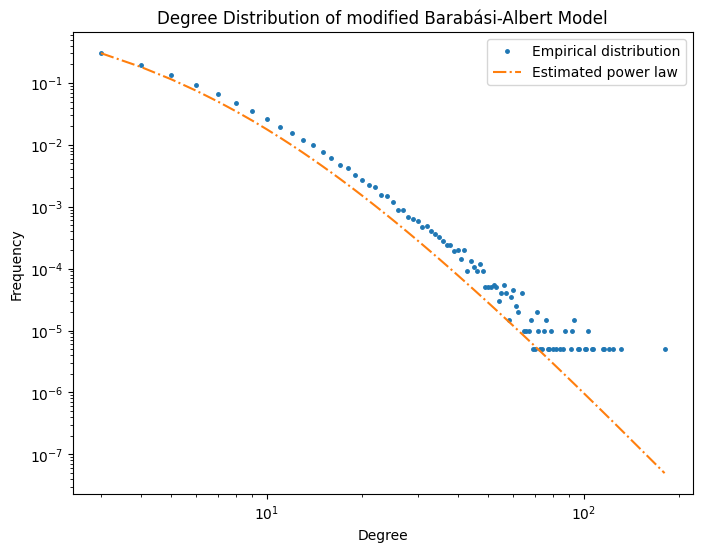

In [22]:
plt.figure(figsize=(8, 6))
plt.loglog(unique_degrees, degree_distribution, 'o', markersize=2.5, label='Empirical distribution')
plt.loglog(unique_degrees, proxy_power_law(L,C,unique_degrees), '-.', label=f'Estimated power law')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of modified Barabási-Albert Model')
plt.legend()
plt.show()

The differences in the value for $\gamma$ in a power-law functional form implies different behaviours of the dynamics of the phenomenon: in particular the vanilla BA model sets $\gamma$ to be at the so called *critical point* ($\gamma = 3$), since above this value for $\gamma$ the power-law distribution doesn't have anymore diverging second moment (the so called *Scale-free property*). 

This variation in the model allows us to model *ultra small world* ($2 < \gamma < 3$) as well as classic *small world* regimes ($\gamma > 3$): we can see that in this last case a curvature strikes back in the log-log degree distribution, and for higher values we again have good Poisson approximation as in classic random ER graph model. 

The bound $C \geq - L$ ensures that the model doesn't degenerate in an *anomalous regime* where also the first moment diverge: no large network can exist under such a dynamic.

__________________

# Problem 2

## Spectral graph teory: cuts, communities and conductance

In [1]:
import numpy as np
import networkx as nx 
from matplotlib import pyplot as plt

from itertools import combinations

from tqdm import tqdm

### Find the densest subgraph using the Charikar greedy algorithm

Firstly let's define the graph and some representations, also plotting it in ```networkx```. 

In [2]:
nodes = list(range(1,11))

edges = [
    (1,2),
    (1,3),
    (1,4),
    (1,7),
    (2,3),
    (2,4),
    (2,5),
    (3,4),
    (3,7),
    (4,5),
    (5,6),
    (5,9),
    (6,8),
    (6,9),
    (6,10),
    (7,8),
    (7,10),
    (8,9),
    (8,10),
    (9,10)
]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

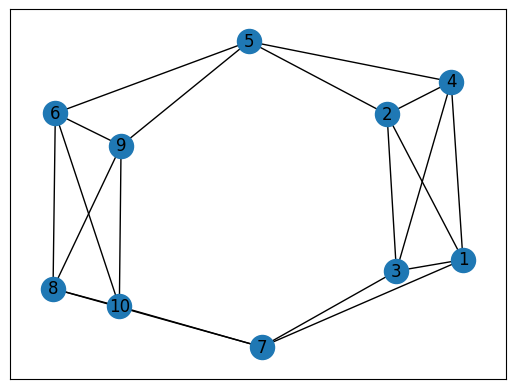

In [3]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

In [4]:
# Adjacency matrix

A = np.zeros((10,10))

for e in edges:
    A[e[0] - 1, e[1] - 1] = 1
    A[e[1] - 1, e[0] - 1] = 1

# Degree matrix

D = np.diag(np.sum(A, axis = 0))

# Laplacian matrix

L = D - A

# Adjacency lists

adj_lists = {v:[] for v in nodes}

for e in edges:
    adj_lists[e[0]].append(e[1])
    adj_lists[e[1]].append(e[0])

In [5]:
adj_lists

{1: [2, 3, 4, 7],
 2: [1, 3, 4, 5],
 3: [1, 2, 4, 7],
 4: [1, 2, 3, 5],
 5: [2, 4, 6, 9],
 6: [5, 8, 9, 10],
 7: [1, 3, 8, 10],
 8: [6, 7, 9, 10],
 9: [5, 6, 8, 10],
 10: [6, 7, 8, 9]}

In [6]:
def Greedy_Densest_Subgraph(
        adj_lists:dict
        ) -> list:
    
    S = list(adj_lists.keys())

    S_G = list(adj_lists.keys())

    f_SG = 0.5*sum(map(lambda x: len(adj_lists[x]), adj_lists))/len(S)

    print(f_SG)
    
    while len(S) > 1:

        v = min(adj_lists, key = lambda k: len(adj_lists[k]))

        S.remove(v)

        adj_lists = {u : [node for node in adj_lists[u] if node != v] for u in list(adj_lists.keys()) if u != v}

        print(adj_lists)
        
        f_S = 0.5*sum(map(lambda x: len(adj_lists[x]), adj_lists))/len(S)
        
        print(f_S)
        
        if f_S >= f_SG:
               
               f_SG = f_S

               S_G = S

    return S_G, f_SG

In [7]:
Greedy_Densest_Subgraph(adj_lists)

2.0
{2: [3, 4, 5], 3: [2, 4, 7], 4: [2, 3, 5], 5: [2, 4, 6, 9], 6: [5, 8, 9, 10], 7: [3, 8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.7777777777777777
{3: [4, 7], 4: [3, 5], 5: [4, 6, 9], 6: [5, 8, 9, 10], 7: [3, 8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.625
{4: [5], 5: [4, 6, 9], 6: [5, 8, 9, 10], 7: [8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.5714285714285714
{5: [6, 9], 6: [5, 8, 9, 10], 7: [8, 10], 8: [6, 7, 9, 10], 9: [5, 6, 8, 10], 10: [6, 7, 8, 9]}
1.6666666666666667
{6: [8, 9, 10], 7: [8, 10], 8: [6, 7, 9, 10], 9: [6, 8, 10], 10: [6, 7, 8, 9]}
1.6
{6: [8, 9, 10], 8: [6, 9, 10], 9: [6, 8, 10], 10: [6, 8, 9]}
1.5
{8: [9, 10], 9: [8, 10], 10: [8, 9]}
1.0
{9: [10], 10: [9]}
0.5
{10: []}
0.0


([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 2.0)

### Find a minimum cut

I decided to implement Karger's randomized algorithm to find a minimum cut. 

It is an algorithm that iteratively contracts the graphs performing a uniformly at random selection of an edge $(u,v)$ and collapsing this edge into a new node $uv$, up to the moment where there's only one cut left. It has nice probabilistic properties that are out of the purposes of this implementation. 

In this case the best representation of the graph is a list of edges and a list of nodes.

In [8]:
def node_merging(u,v):

    if type(u) != tuple:
        u = [u]
    else:
        u = list(u)

    if type(v) != tuple:
        v = [v]
    else:
        v = list(v)

    return tuple(u + v)

In [9]:
def Karger(E:list,
           V:list
           ):
    
    # Initialization

    E_ = E.copy()
    V_ = V.copy()
    
    while len(V_) > 2:
        
        # Random choice of an edge
        
        idx = np.random.choice(range(1,len(E_)), 1)[0]
        e = E_[idx]

        # Our supernode

        supernode = node_merging(e[0],e[1])
        V_.append(supernode)

        # Get rid of the edge

        V_.remove(e[0])
        V_.remove(e[1])
        E_.remove(e)

        # Connect the new retrieved super node

        trash_coll = []
        for edge in E_:
            new_edge = (0,0)
            if e[0] in edge:
                if edge[0] == e[0]:
                    trash_coll.append(edge)
                    new_edge = (supernode, edge[1])

                elif edge[1] == e[0]:
                    trash_coll.append(edge)
                    new_edge = (edge[0], supernode)

            elif e[1] in edge:
                if edge[0] == e[1]:
                    trash_coll.append(edge)
                    new_edge = (supernode, edge[1])

                elif edge[1] == e[1]:
                    trash_coll.append(edge)
                    new_edge = (edge[0], supernode)

            if new_edge[0] != new_edge[1]:
                E_.append(new_edge)                    
        for e in trash_coll:
            E_.remove(e)


    return V_

In [10]:
Karger(edges, nodes)

[7, (1, 2, 4, 5, 3, 6, 10, 8, 9)]

We are not interested in the probabilistic outcomes of the algorithm: however, let's have a look to the cuts retrieved by repeating the algorithm:  

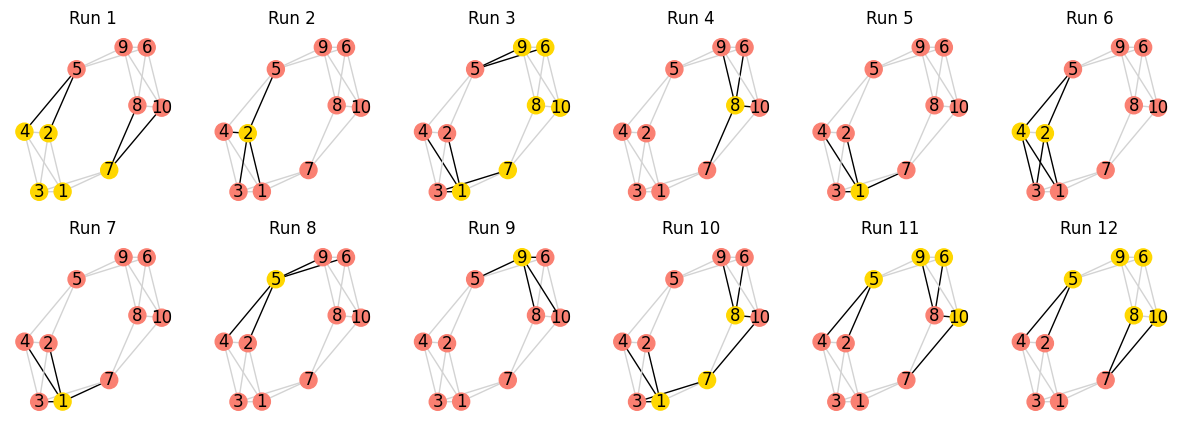

In [11]:
np.random.seed(4200)

cuts = []
for _ in range(12):
    cuts.append(Karger(edges, nodes))

# Slight correction on the structure of the cuts

for cut in cuts:
    if type(cut[0]) == int:
        cut[0] = tuple([cut[0]])
    elif type(cut[1]) == int:
        cut[1] = tuple([cut[1]])
    
fig, axes = plt.subplots(2, 6, figsize=(15, 5))
pos = nx.spring_layout(G, seed=4200)

for i, cut in enumerate(cuts):
    row = i // 6
    col = i % 6

    edge_colors = ['black' if ((u in cut[0] and v not in cut[0]) or (v in cut[0] and u not in cut[0])) else 'lightgrey' for u, v in G.edges()]

    nx.draw(G, 
            pos = pos, 
            ax=axes[row, col], 
            with_labels=True, 
            node_size = 150,
            node_color=['gold' if node in cut[0] else 'salmon' for node in nodes],
            edge_color=edge_colors)

    # Set title

    axes[row, col].set_title(f'Run {i+1}')

As we can see, in 12 runs the algorithm retrieves no cuts whose cut size is less than 4. We cannot have any confidence in saying that this is the minimum cut size, so we'll rely on spectral graph theory. 

### Show that Cheeger's inequality hold for this graph

Given the second smallest eigenvalue $\lambda_2$ of the graph laplacian, Cheeger's inequality states that the graph conductance $\phi_G$ is bounded as follows:

$$ \frac{\lambda_2}{2} \leq \phi_G \leq \lambda_2 $$

where the conductance is defined as the minimum among the conductance of all cuts, where a cut conductance is the cardinality of the cut over its volume as the minimum between the sum of the degrees of the nodes within one of the two partitions:

$$ \phi_G = \underset{C1 \subset V, C2 = V \setminus C1}{\mathrm{min}} \ \ \frac{|E(C1,C2)|}{\min\{ \sum_{i \in C1} d_i, \sum_{i \in C2} d_i\}} $$

Since the given graph is quite small, we can compute its conductance explicitely:

In [12]:
cuts_conductance = {}

for m in tqdm(range(1,6)):

    cuts = list(combinations(nodes, m))

    for cut in cuts:

        C1 = cut

        C2 = [node for node in nodes if node not in cut]

        E_C1C2 = len([e for e in edges if (e[0] in C1 and e[1] in C2) or (e[1] in C1 and e[0] in C2)])

        sum_d1 = sum(map(len, 
                         dict(
                             filter(
                                 lambda item: item[0] not in C1, adj_lists.items())).values()))
        
        sum_d2 = sum(map(len, 
                         dict(
                             filter(
                                 lambda item: item[0] not in C2, adj_lists.items())).values()))
        

        cuts_conductance[C1] = E_C1C2 / min((sum_d1, sum_d2))
                

100%|██████████| 5/5 [00:00<00:00, 384.48it/s]


In [13]:
min_cut, min_phi_G = min(cuts_conductance.items(), key = lambda x: x[1])

In [14]:
min_cut

(1, 2, 3, 4, 5)

In [15]:
min_phi_G

0.2

Now to check if Cheeger's inequality holds we need the second smallest eigenvalue of the normalized laplacian matrix: since our graph is $d$-regular, with $d = 4$ we have that 
$$ \mathcal{L} = \mathbb{I} - \frac{1}{d}A $$

In [16]:
# Normalized laplacian of a d-regular graph with d = 4

d = 4
L_ = np.eye(L.shape[0]) - A/d

# Eigendecomposition through numpy functions

lambdas, U = np.linalg.eig(L_)

In [17]:
# We call np.real over the eigenvalues to get rid of numerical problems with imaginary parts

lambda_2 = np.sort(np.real(lambdas))[1]

In [18]:
lambda_2

0.2500000000000001

In [19]:
(lambda_2/2 <= min_phi_G) & (min_phi_G <= np.sqrt(2*lambda_2))

True

### Find the cut that satisfies Cheeger's inequality

We are given a $d$-regular graph ($d = 4$), so we can use the ```SWEEPING``` algorithm we have seen during lectures.

This algorithm leverages the eigendecomposition of the normalized laplacian of an undirected $d$-regular graph $G(V,E)$, giving as output a cut $(C_1, C_2)$ minimizing the conductance. 

First of all we retrieve the eigendecomposition of the normalized laplacian for the graph, being as we said before
$$ \mathcal{L} = \mathbb{I} - \frac{1}{d}A $$

and we collect the eigenvector $v_2$ corresponding to the second smallest eigenvalue: according to ```numpy``` documentation, eigenvalues retrieved through ```linalg.eig``` are not necessarily sorted, so we have to sort them as well as we have to sort accordingly the eigenvectors, which are given in a matrix of column vectors. 

In [20]:
# Just repeating previous computations

d = 4
L_ = np.eye(L.shape[0]) - A/d

lambdas, U = np.linalg.eig(L_)

In [21]:
# We have to sort properly both the eigenvalues and the eigenvectors

idxs = np.argsort(np.real(lambdas))
lambdas = np.real(lambdas)[idxs]
U = np.real(U[:,idxs])

In [22]:
v_2 = U[:,1]

Now let's sort the nodes increasingly with respect to $v_2$:

In [23]:
nodes_sorted = np.argsort(v_2)

In [24]:
nodes_sorted

array([7, 8, 5, 9, 6, 4, 0, 2, 1, 3], dtype=int64)

In [25]:
v_2

array([ 3.53553391e-01,  3.53553391e-01,  3.53553391e-01,  3.53553391e-01,
        9.29592289e-18, -3.53553391e-01, -4.44460925e-17, -3.53553391e-01,
       -3.53553391e-01, -3.53553391e-01])

The next step is a loop over all the vertices sorted with respect to $v_2$. We consider the sorted vector to be $x_1 \leq x_2 \leq ... \leq x_n$, so that the index point to the respective vertex. 

Now we perform the "sweeping" step: we iterate over $i \in \{1,2,..,n -1\}$ and retrieve the conductance associated to all the cuts $C_1 = \{1,...,i\}, C_2 = V \backslash C_1$: then we retrieve the cut whose conductance is the minimum. 

In [26]:
phis = {}
C1 = []
C2 = nodes

for i in range(len(nodes)-1):
    
    # Do the sweeps between the two cuts

    C1.append(nodes_sorted[i]+1)
    C2.remove(nodes_sorted[i]+1)
    
    # As before collect the quantities need to compute conductance of the cut of interest
    
    E_C1C2 = len([e for e in edges if (e[0] in C1 and e[1] in C2) or (e[1] in C1 and e[0] in C2)])

    sum_d1 = sum(map(len, 
                        dict(
                            filter(
                                lambda item: item[0] not in C1, adj_lists.items())).values()))
    
    sum_d2 = sum(map(len, 
                        dict(
                            filter(
                                lambda item: item[0] not in C2, adj_lists.items())).values()))
    

    phis[tuple(C1)] = E_C1C2 / min((sum_d1, sum_d2))

In [27]:
phis

{(8,): 1.0,
 (8, 9): 0.75,
 (8, 9, 6): 0.5,
 (8, 9, 6, 10): 0.25,
 (8, 9, 6, 10, 7): 0.2,
 (8, 9, 6, 10, 7, 5): 0.25,
 (8, 9, 6, 10, 7, 5, 1): 0.5,
 (8, 9, 6, 10, 7, 5, 1, 3): 0.75,
 (8, 9, 6, 10, 7, 5, 1, 3, 2): 1.0}

In [28]:
min_cut_SW, min_phi_G_SW = min(phis.items(), key = lambda x: x[1])

In [29]:
min_cut_SW

(8, 9, 6, 10, 7)

In [30]:
min_phi_G_SW

0.2

We found the exactly same cut: we just got in output the complementary set of the one retrieved with the brutal enumeration. This algorihtm yields a good approximation for the computation of the conductance, providing an heuristic for a NP-hard problem that drops drastically the computation complexity. 

__________

# Problem 3

## Expected degree and expected average degree of neighborhood

Let's consider a deterministic graph $G(V,E)$ and the random variable $X$ being the grade of a random node in $V$. Let's define also the random variable $Y$ as the average degree of the neighborhood of a random node. 

If we define a uniform sampling scheme over the nodes, we have:

$$ \mathbb{E}[X] = \frac{1}{|V|} \sum_{v \in V} d_v $$
$$ \mathbb{E}[Y] = \frac{1}{|V|} \sum_{v \in V} \frac{1}{|V(v)|} \sum_{u \in V(v)} d_u $$

where $V(v)$ is the neighborhood of node $v$, so that clearly it is $|V(v)| = d_v$: 

$$ \mathbb{E}[X] = \frac{1}{|V|} \sum_{v \in V} d_v $$
$$ \mathbb{E}[Y] = \frac{1}{|V|} \sum_{v \in V} \sum_{u \in V(v)} \frac{d_u}{d_v} $$

It clearly follows that for $d$-regular graph, where $d_w = d$ for each $w \in V$, $\mathbb{E}[X] = \mathbb{E}[Y]$: 

$$ \mathbb{E}[X] = \frac{1}{|V|} \sum_{v \in V} d = \frac{1}{|V|} |V|d = d $$
$$ \mathbb{E}[Y] = \frac{1}{|V|} \sum_{v \in V} \sum_{u \in V(v)} \frac{d}{d} =  \frac{1}{|V|} \sum_{v \in V} \sum_{u \in V(v)} 1 = \frac{1}{|V|} \sum_{v \in V} d = \frac{1}{|V|} |V|d = d $$

Now we have to show that instead, without regularity assumption, $\mathbb{E}[X] \leq \mathbb{E}[Y]$.

First of all, let's highlight that:
$$ \mathbb{E}[Y] = \frac{1}{|V|} \sum_{v \in V} \sum_{u \in V(v)} \frac{d_u}{d_v} = \frac{1}{|V|} \sum_{v \in V} \sum_{u \in V} A_{uv}\frac{d_u}{d_v}$$

where is the adjacency matrix of the graph, that works in this case like an indicator function for the inner sum over the neighborhood of the node $v$.

Now let's compute the quantity $\mathbb{E}[X] - \mathbb{E}[Y]$:

$$ \mathbb{E}[X] - \mathbb{E}[Y] =\frac{1}{|V|} \sum_{v \in V} d_v - \frac{1}{|V|} \sum_{v \in V} \sum_{u \in V} A_{uv}\frac{d_u}{d_v} =
\frac{1}{|V|} \sum_{v \in V}(d_v - \sum_{u \in V} A_{uv}\frac{d_u}{d_v} ) = \frac{1}{|V|} \sum_{v \in V} \sum_{u \in V} A_{uv}( 1 - \frac{d_u}{d_v} )$$

where the last step comes from the fact that the degree of a node is the sum over its respective column (or row) in the adjacency matrix.
So we have:

$$ \mathbb{E}[X] - \mathbb{E}[Y] =\frac{1}{|V|} \sum_{v,u} A_{uv}( 1 - \frac{d_u}{d_v} )$$

Being the adjacency matrix symmetric, this double sum is perfectly equivalent to:

$$ \mathbb{E}[X] - \mathbb{E}[Y] =\frac{1}{|V|} \sum_{u,v} A_{uv}( 1 - \frac{d_v}{d_u} )$$

So we can sum these two expressions:

$$ 2(\mathbb{E}[X] - \mathbb{E}[Y]) =\frac{1}{|V|} \sum_{u,v} A_{uv}[2 - (\frac{d_u}{d_v} + \frac{d_v}{d_u})]$$
$$ \mathbb{E}[X] - \mathbb{E}[Y] =\frac{1}{2|V|} \sum_{u,v} A_{uv}[2 - (\frac{d_u}{d_v} + \frac{d_v}{d_u})]$$

Now we can leverage the following: 

$$ \frac{a}{b} + \frac{b}{a} \geq 2 $$
$$ \frac{a^2 + b^2}{ab} \geq 2 \rightarrow a^2 + b^2 \geq 2ab \rightarrow a^2 + b^2 - 2ab \geq 0 \rightarrow (a-b)^2 \geq 0 $$

that is clearly true $\forall a,b \in \mathbb{R}$.

Since we have that $(\frac{d_u}{d_v} + \frac{d_v}{d_u}) \geq 2$, all the terms inside the sum $2 - (\frac{d_u}{d_v} + \frac{d_v}{d_u})$ are nonpositive. 

This implies that over all $\mathbb{E}[X] - \mathbb{E}[Y] \leq 0$, that means $\mathbb{E}[X] \leq \mathbb{E}[Y]$. 

_____________

# Problem 4

In [6]:
from collections import deque
import numpy as np
from tqdm import tqdm

import networkx as nx
from matplotlib import pyplot as plt

## Design of a streaming and sampling algorithm for dynamic networks 

## First approach: brutal but easy

In order to solve the problem as it is stated, we need to reason in terms of streaming and sampling algorithm. In the given case the main question to answer how do we keep a "good statistic" of the edge flow? 

Since we are interested in connectivity, a starting point would be to be able to keep track of the edge flow in the form of the resulting *forest* arising from the sequence: considering the query design, in order to check connectivity we need to be able to check the number of connected components, and the idea of the growing forest is good in this way, since each of the tree is a connected component itself. 

In order to keep a forest of trees, we need also to be capable of querying an arriving edge $e_{t+1}$: in particular we need to know if adding it any cycle is formed. In that case, there is no improvement in connectivity, and we lose the forest-of-trees structure.

Now we need a data structure capable of supporting the query we defined previously and also the following operations: 
+ Add a new node as a new rooted tree: if an edge comes as a pair of new nodes, we need to firstly insert them in our data structure, and then eventually link them;
+ Add a link between existing nodes: once we are sure we are correctly keeping track of new-seen nodes, we can link them accordingly to the edge stream;
+ Cut a link between existing nodes: the sliding window model requires us to be capable of splitting two trees once an edge expires accordingly to the length $w$ of the sliding window. 

A first brutal approach could be using Disjoint Forests, a data structure supporting the following operations:
+ ```make_set(x)```: insert a new node a singleton rooted-tree;
+ ```find(x)```: find the root of a node and update the path in an aggregation fashion;
+ ```union(x,y)```: link the two nodes. 

Unfortunately this data structure does not support edge cutting, but on the other hand are very easy to be implemented and the related operations are quite time-efficient. 
The workflow could be:
+ Keep a buffer for the window whose size is $\mathcal{O}(w)$;
+ Keep a buffer for the seen nodes whose size is $\mathcal{O}(V)$;
+ At each time iteration build the resulting disjoint forest adding all the seen nodes and linking them according to the active edges paying attention to the formation of cycles: this is actually very easy since an edge $(u,v)$ would form a cycle if they have the same root, so we just need to check ```find(u)``` $\neq$ ```find(v)``` before connecting them; moreover, in this brutal approach we don't need to drop the oldest edge in the cycle since we are rebuilding the entire forest at each iteration, so we just don't link two nodes if they would forma cycle.
+ Query the data structure for connectivity. 

In [21]:
class DisjointForest():
    def __init__(self):
        
        self.parents = {}
        #self.rank = {}

    def find(self,
             node):
        
        try:

            # Path aggregation 
            if self.parents[node] != node:
                self.parents[node] = self.find(self.parents[node])

            return self.parents[node]
        
        except KeyError:
            
            return None
    
    def insert(self,
               node):
        
        if not self.find(node):
            self.parents[node] = node
            #self.rank[node] = 0

    def union(self, 
              u, 
              v):
        
        root_u = self.find(u)
        root_v = self.find(v)

        if root_u == root_v:
            return False
        else:
            self.parents[root_u] = root_v
            return (u,v)
        
    def connectivity(self):
        return 'Connected' if len(set([self.find(x) for x in self.parents.keys()])) == 1 else 'Disconnected'

In [22]:
def edgeGenerator(V = 150):
    return tuple(np.random.choice(np.arange(V), size=(1,2), replace=False)[0])

def test(V, w, T):
    edge_buffer = deque(maxlen=w)
    node_buffer = set()
    
    num_cols = int(np.sqrt(T))
    num_rows = int(np.ceil(T / num_cols))
    
    _, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)  
    
    axes = axes.flatten()  
    
    for i in tqdm(range(T)):
        e = edgeGenerator(V)
        node_buffer.add(e[0])
        node_buffer.add(e[1])
        edge_buffer.appendleft(e)
        
        edge_buffer_ = []

        DF = DisjointForest()
        for v in node_buffer:
            DF.insert(v)
        for edge in edge_buffer:
            E = DF.union(edge[0], edge[1]) 
            if E:
                edge_buffer_.append(E)
            
        G = nx.Graph()
        G.add_nodes_from(node_buffer)
        G.add_edges_from(edge_buffer)
        
        pos = nx.spring_layout(G, seed=4200)
        
        ax = axes[i]
        ax.set_title(str(DF.connectivity()), fontsize=10)
        nx.draw(G, pos=pos, with_labels=True, ax=ax, node_size=30, node_color='lightblue')

    for i in range(T, num_rows * num_cols):
        axes[i].axis('off')
    
    plt.show()

100%|██████████| 64/64 [00:01<00:00, 46.75it/s]


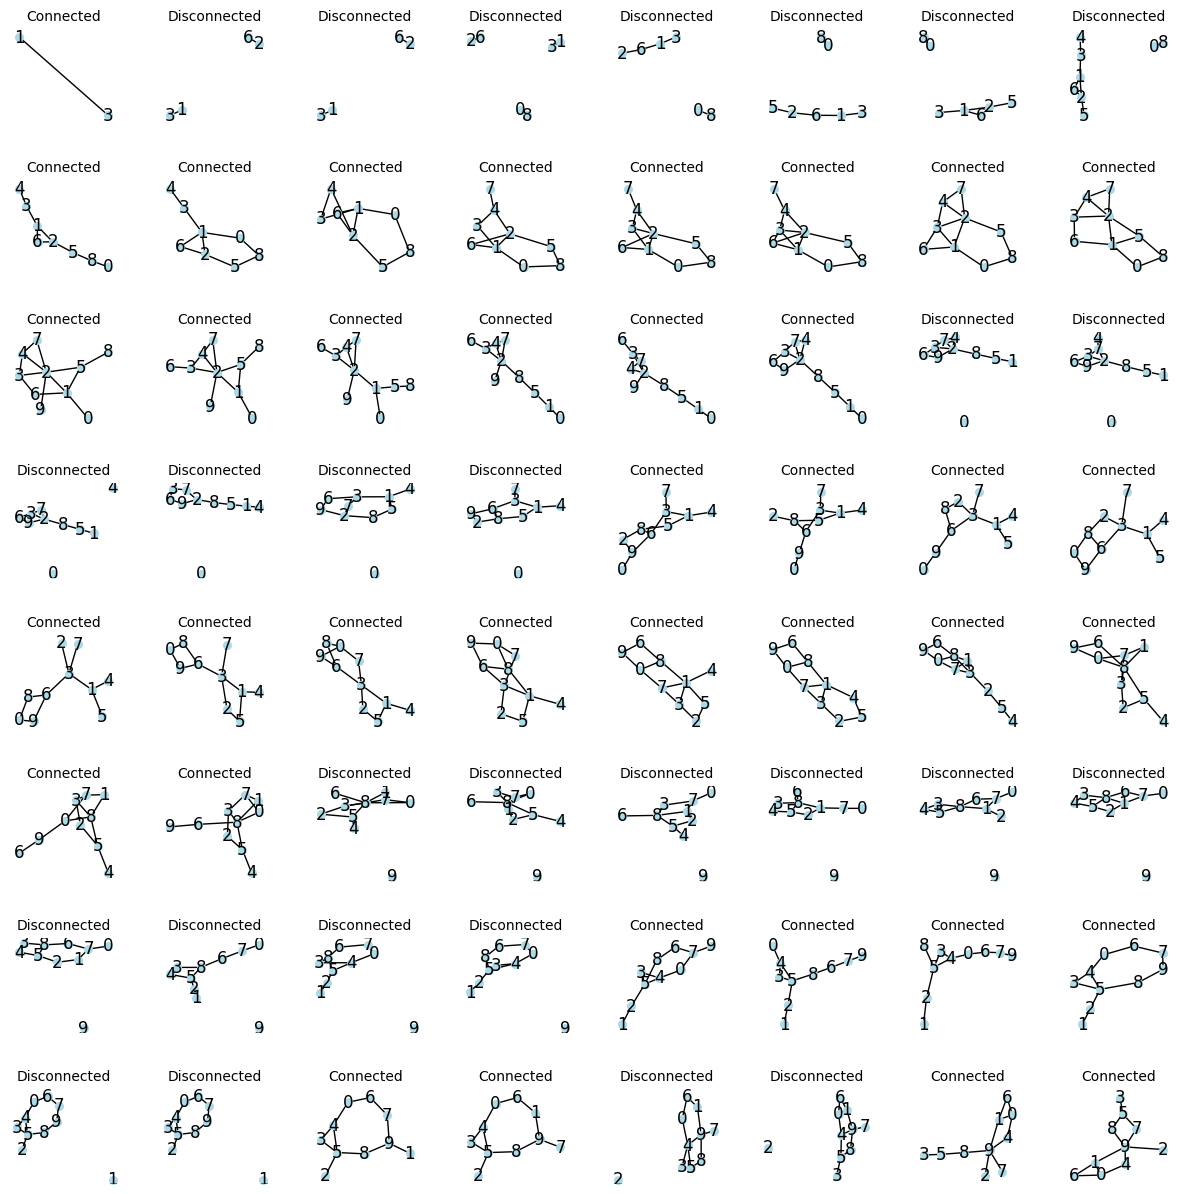

In [23]:
test(V = 10,
     w = 13,
     T = 64)

Unfortunately, this approach is not good from many perspectives of a streaming algorithm, since it doesn't leverage the state in $t$ to compute the state in $t + 1$. However:
+ It requires $\mathcal{O}(V + w)$ memory for storing the buffer of the nodes and the buffer for the edges;
+ From a time complexity perspective, at each iteration we need to: 
    + Populate the disjoint forest with $V$ elements, but each operation is constant in time $\mathcal{O}(1)$;
    + Make $E$ ```union``` operation, whose complexity is $\mathcal{O}(w \log^* V)$;
    + Compute the number of connected components, whose amortized complexity is $\Theta(\alpha(V))$.

So in the end we have:
+ $\mathcal{O}(V + w \log^*V + \alpha(V))$ for time complexity;
+ $\mathcal{O}(V + 2w)$ for space complexity.

_________

# Problem 5

In [1]:
import networkx as nx
import numpy as np 
from matplotlib import pyplot as plt
from tqdm import tqdm

## Modeling backfire in opinion dynamics

### A starting point: bounded confidence model

The idea is to start from the bounded confidence model as it was formulated in the paper originally defining this results, *"Mixing beliefs among interacting agents"* (Deffuant, G., Neau, D., Amblard, F., and Weisbuch, G., 2000). 

The model assumes a fully connected network of agents where each $i$-th agent expresses an initial opinion $x_i[0] \sim \mathrm{Unif}(0,1)$.
At each timestamp, a certain number of pairwise uniformly-at-random communications among agents happen, and their opinion are updated as follows:

$$ x_{i}[t+1] = x_i[t] + \mu (x_j[t] - x_i[t]) \mathbb{I} (|x_i[t] - x_j[t]| < \epsilon)$$
$$ x_{j}[t+1] = x_j[t] + \mu (x_i[t] - x_j[t]) \mathbb{I} (|x_i[t] - x_j[t]| < \epsilon)$$

In other words, the opinion of interacting agents results in a convex combination of their previous opinions through a tunable parameter $\mu$ (it was considered within the range $(0,0.5)$ in the original paper) if their opinion are close enough: these closeness is encoded by the indicator function and the tunable parameter $\epsilon$. 

We know that this simple dynamic can easily model both consensus and polarization: 

In [2]:
np.random.seed(42)

N = 1000
G = nx.complete_graph(N)

x_0 = np.random.uniform(0,1,N)
X = x_0.copy()
eps = 0.2
mu = 0.5

T = 50
M = np.zeros((T,N))

for _ in tqdm(range(T)):
    x_ = X.copy()
    for e in np.array(G.edges)[np.random.randint(0,len(list(G.edges)), 1000)]:
        i = e[0]
        j = e[1]
        if np.abs(X[i] - X[j]) < eps:
            x_[i] = X[i] + mu * (X[j] - X[i])
            x_[j] = X[j] + mu * (X[i] - X[j])
    M[_, :] = x_
    X = x_

x_0 = np.random.uniform(0,1,N)
X = x_0.copy()
eps = 0.5
mu = 0.5

M_2 = np.zeros((T,N))

for _ in tqdm(range(T)):
    x_ = X.copy()
    for e in (np.array(G.edges)[np.random.randint(0,len(list(G.edges)), 1000)]):
        i = e[0]
        j = e[1]
        if np.abs(X[i] - X[j]) < eps:
            x_[i] = X[i] + mu * (X[j] - X[i])
            x_[j] = X[j] + mu * (X[i] - X[j])
    M_2[_, :] = x_
    X = x_

100%|██████████| 50/50 [00:13<00:00,  3.74it/s]


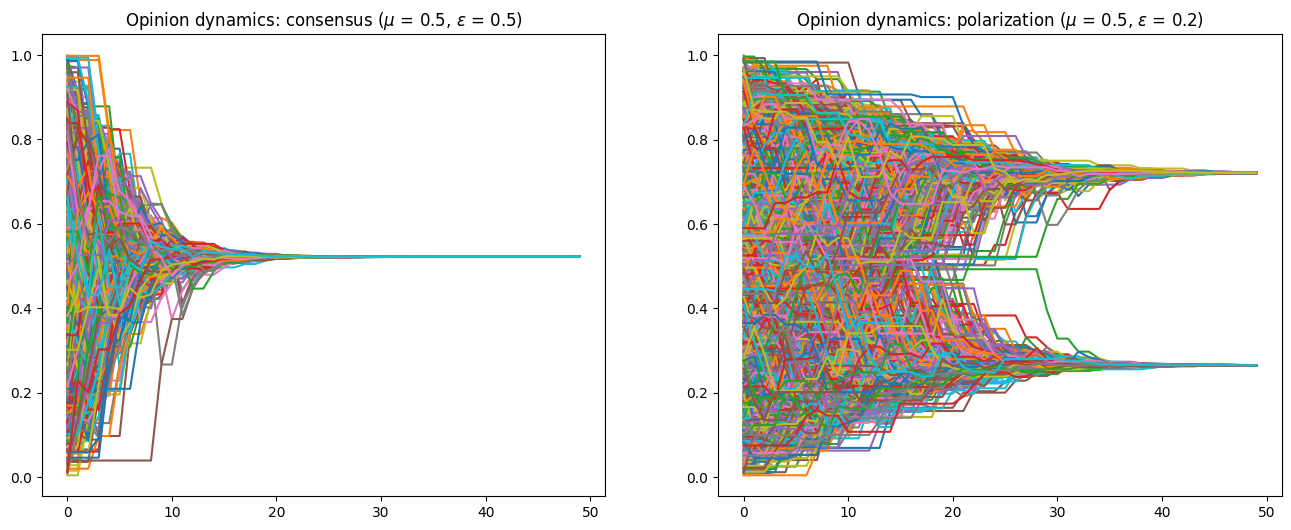

In [3]:
fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].plot(M_2);
axs[0].title.set_text('Opinion dynamics: consensus ($\mu$ = 0.5, $\epsilon$ = 0.5)')
axs[1].plot(M);
axs[1].title.set_text('Opinion dynamics: polarization ($\mu$ = 0.5, $\epsilon$ = 0.2)')

What is interesting to note is that polarization is just consensus reached within distinct clusters of agents: instead, when modeling backfire we are interested in getting away from consensus rather than moving towards it, in a sort of "agree to disagree" fashion. 

Still, bounded confidence is interesting because we have a very simple adaptive mechanism: now we want to make it anthagonistic. 

### From convex combination to non convex combinations: bounded backfire

The idea is to revert the previous model introducing an anthagonistic mechanism if opinions of two interacting agents are far enough: in order to do so, we can consider a very simple geometric idea. A convex combination between two point $x,y$ in a vector space yields a point $P$ lying in the portion of the line connecting this two points: the equation is just 

$$ P = x + \alpha(y-x), \ \alpha \in [0,1] $$

Clearly we have that 

$$ P \equiv x \iff \alpha = 0 $$
$$ P \equiv y \iff \alpha = 1 $$

This segment in an opinion dynamic perspective can be seen as a *neutral region* where opinions may reach consensus. 

Instead, considering the same equation we have that for $\alpha \in (- \infty, 0) $ the point $P$ lies on the half-line parallel to the one determined by $x$ and $y$ starting from $x$. Viceversa, for $\alpha \in (1, + \infty)$ we have that $P$ lies on the half-line parallel to the one determined by $x$ and $y$ starting from $y$: we can consider these two half-line as *exasperation regions*. It is clear that these parameters yields not anymore a convex combination; indeed, we can leverage this to design a diverging model. 

Given a fully connected network of agent, we consider the following dynamic on a certain number of random interactions: 

$$ x_{i}[t+1] = x_i[t]  - \mu  (x_j[t] - x_i[t]) \mathbb{I} (|x_i[t] - x_j[t]| > \eta)$$
$$ x_{j}[t+1] = x_j[t]  - \mu (x_i[t] - x_j[t]) \mathbb{I} (|x_i[t] - x_j[t]| > \eta)$$

Under the assumptions that $\mu \in (0,1)$, in this model we have that if there is disagreement $(|x_i[t] - x_j[t]| > \eta)$, the opinions are pushed towards the respective exasperation region of each agent as we previously defined them.


Let's have a look to small simulations on a network of 10 agents over a small time horizon. 

In [7]:
N = 10
G = nx.complete_graph(N)

x_0 = np.random.uniform(0,1,N)
X = x_0.copy()
eps = 0.2
eta = 0.9
mu = 0.5

T = 10
M = np.zeros((T,N))

for _ in tqdm(range(T)):
    x_ = X.copy()
    for e in np.array(G.edges)[np.random.randint(0,len(list(G.edges)), 10)]:
        i = e[0]
        j = e[1]
        
        if np.abs(X[i] - X[j]) > eta:
            x_[i] = X[i] - mu * (X[j] - X[i])
            x_[j] = X[j] - mu * (X[i] - X[j])
    M[_, :] = x_
    X = x_

eta = 0.6
mu = 0.5

T = 10
M_ = np.zeros((T,N))

for _ in tqdm(range(T)):
    x_ = X.copy()
    for e in np.array(G.edges)[np.random.randint(0,len(list(G.edges)), 10)]:
        i = e[0]
        j = e[1]

        if np.abs(X[i] - X[j]) > eta:
            x_[i] = X[i] - mu * (X[j] - X[i])
            x_[j] = X[j] - mu * (X[i] - X[j])
    M_[_, :] = x_
    X = x_

eta = 0.1
mu = 0.5

T = 10
M_2 = np.zeros((T,N))

for _ in tqdm(range(T)):
    x_ = X.copy()
    for e in np.array(G.edges)[np.random.randint(0,len(list(G.edges)), 10)]:
        i = e[0]
        j = e[1]

        if np.abs(X[i] - X[j]) > eta:
            x_[i] = X[i] - mu * (X[j] - X[i])
            x_[j] = X[j] - mu * (X[i] - X[j])
    M_2[_, :] = x_
    X = x_

100%|██████████| 10/10 [00:00<00:00, 9986.44it/s]


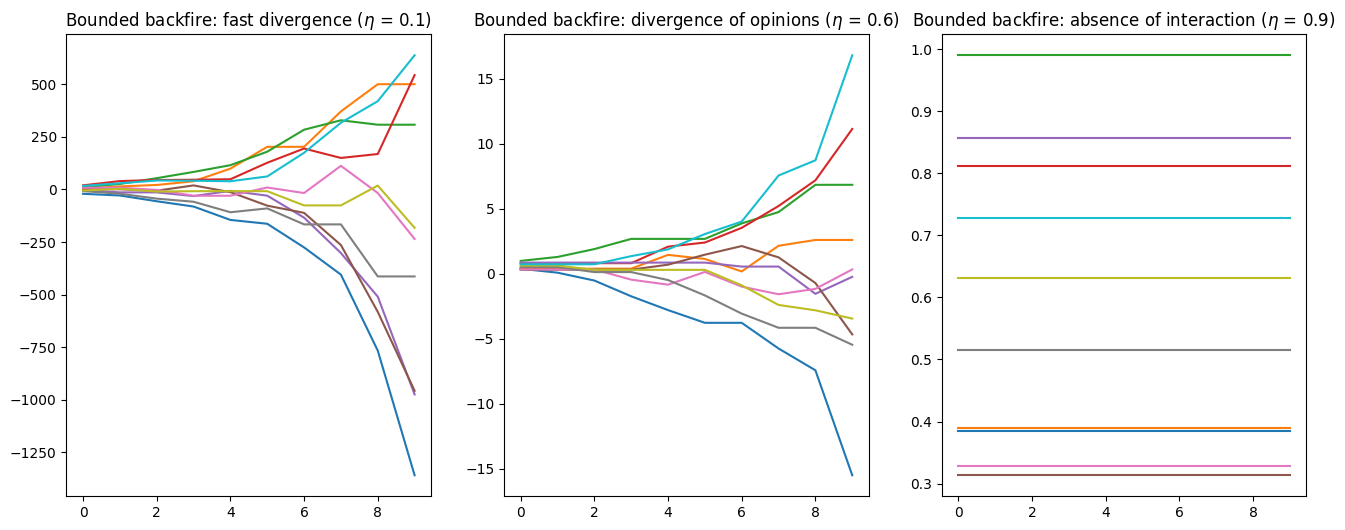

In [11]:
fig, axs = plt.subplots(1,3,figsize=(16,6))
axs[0].plot(M_2);
axs[0].title.set_text('Bounded backfire: fast divergence ($\eta$ = 0.1)')
axs[1].plot(M_);
axs[1].title.set_text('Bounded backfire: divergence of opinions ($\eta$ = 0.6)')
axs[2].plot(M);
axs[2].title.set_text('Bounded backfire: absence of interaction ($\eta$ = 0.9)')

As we can see the parameter $\eta$ influences the divergence of the opinions in its speed, up to the point that a certain value of it doesn't allow for backfire anymore. 

## The theoretical underground: heat diffusion equations, Laplacians and time varying Laplacians

Let's consider a very generic continuous time laplacian dynamic for a graph: the continuous time is easy to be analyzed theoretically.
$$
\begin{cases}
    \frac{\partial}{\partial t} x(t) = - \alpha L x(t) \\ 
    x(0) = x_0
\end{cases}
$$

The solution for this dynamic is 

$$ x(t) = e^{-\alpha L t}x_0$$

and we know that it admits a stable equilibrium in $\bar{x} = \mathbb{1}^Tx_0$ if the graph is connected: due to the spectral qualities of the laplacian, the initial state is projected over its kernel. 
The point is that with our bounded backfire we defined a non-linear laplacian that is nomore positive semidefinite through time, so we have no garancies about convergences of the related dynamics. 

### Vanilla consensus: peaceful mixing of opinions. 

Let's start considering a laplacian defined as follows:

$$ L = \mu BB^T $$ 

where we are weighting all the connections the same by $\mu \geq 0$, and $B$ is the incidence matrix encoding for the full connectivity of our model (assume also an arbitrary orientation). We also relax the stochasticity of our model, assuming that all pairs communicate at every timestamp. 

This model would be a simple consensus process, with no bounds on confidence or backfire: it would correspond to the discrete time dynamic

$$ x_{i}[t+1] = x_i[t] + \mu (x_j[t] - x_i[t]) $$
$$ x_{j}[t+1] = x_j[t] + \mu (x_i[t] - x_j[t]) $$

It would correspond to the general case we introduced before: the laplacian is constant in time and is by construction positive semidefinite, leading as we know to global consensus asymptotically. 

### Nonlinear Laplacian of bounded confidence: still convergent!

Let's go back to bounded confidence as a clarifying example: 

$$ x_{i}[t+1] = x_i[t] + \mu (x_j[t] - x_i[t]) \mathbb{I} (|x_i[t] - x_j[t]| < \epsilon)$$
$$ x_{j}[t+1] = x_j[t] + \mu (x_i[t] - x_j[t]) \mathbb{I} (|x_i[t] - x_j[t]| < \epsilon)$$

Let's relax some assumption: in particular, we'll consider the related continuous time dynamics and we'll drop stochasticity, assuming that all pairs communicate at each timestamp (as we'll see later, the random communications just require to insert a slight modification in a nonlinear laplacian introducin a sampling operator). Defining the incidence matrix $B$ properly encoding the full connectivity of our model up to an arbitrary orientation, we have defined the nonlinear laplacian 

$$ \widetilde{L} = \mu B \Psi(t) B^T $$

where $\Psi(t) : E \rightarrow E$ is a diagonal matrix whose entries modifies the weight of each edge to be either 0 or 1: 

$$
[\Psi(t)]_{ee} = \begin{cases}
    0 & \text{if} & |x_i(t) - x_j(t)| > \epsilon, e \sim (i,j)\\ 
    1 & \text{if} & |x_i(t) - x_j(t)| \leq \epsilon, e \sim (i,j)\\
\end{cases}
$$

The laplacian dynamic now is:
$$
\begin{cases}
    \frac{\partial}{\partial t} x(t) = - \alpha \mu B \Psi(t) B^T x(t) \\ 
    x(0) = x_0
\end{cases}
$$ 

In this case what happens is straightforward: the injected non-linearity may encourages disconnections, leading to polarizations within new formed connected components, but cannot result in divergence, since we are not introducing negative eigenspaces in the laplacian spectrum. 

### Nonlinear laplacian of bounded backfire: at most silence, but divergence at first clash

Let's try to recast our model in the laplacian dynamic framework: this equations represents a discretization of the same continuous time process we defined before. 

$$ x_{i}[t+1] = x_i[t] - \mu  (x_j[t] - x_i[t]) \mathbb{I} (|x_i[t] - x_j[t]| > \eta)$$
$$ x_{j}[t+1] = x_j[t] - \mu (x_i[t] - x_j[t]) \mathbb{I} (|x_i[t] - x_j[t]| > \eta)$$

In our case instead, we have defined a non-linear Laplacian:

$$ \widetilde{L} = \mu B \Phi(t) B^T $$

where $\Phi(t) : E \rightarrow E$ is a diagonal matrix whose entries modifies the weight of each edge to be either 0 or -1: 

$$
[\Phi(t)]_{ee} = \begin{cases}
    0 & \text{if} & |x_i(t) - x_j(t)| < \eta, e \sim (i,j)\\ 
    -1 & \text{if} & |x_i(t) - x_j(t)| \geq \eta, e \sim (i,j)\\
\end{cases}
$$

The laplacian dynamic now is:
$$
\begin{cases}
    \frac{\partial}{\partial t} x(t) = - \alpha \mu B \Phi(t) B^T x(t) \\ 
    x(0) = x_0
\end{cases}
$$ 

Clearly with this construction we don't have anymore a positive semidefinite Laplacian: accordingly to the strength of the thresholding we may have disconnections, enlarging the dimension of the kernel and discouraging any kind of mixture of opinions, or we may modify the sign of the matrix to be indefinite or negative semidefinite: this leads to divergence of opinions. 

This very simple model clarifies the underlying properties of diffusion processes and is a good starting point for further modeling: it is for example very easy to introduce back opinion mixing in the model through bounded confidence, or to consider personalized communications. 

___________________________________

# Problem 6

## GNN for node classification and link prediction

In [1]:
# Import the libraries

import numpy as np
import pandas as pd

from collections import Counter
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import torch
import matplotlib.pyplot as plt

from torch_geometric.datasets import Planetoid

from models_utils import GCNNet, SAGENet, GATNet, EncoderDecoder
from train_utils import node_classification_train_loop, node_classification_test
from train_utils import edge_splitting, encoder_decoder_train_loop, test_encoder_decoder

import networkx as nx 

SEED = 0
torch.manual_seed(SEED)
np.random.seed(SEED)

torch.set_default_dtype(torch.float64)

When loading data, after many different tests, I decided to set the attribute ```split``` to ```full```, since the models were sensitive to the amount of labeled data. 

In [2]:
dataset = Planetoid(root='/data', name='PubMed', split='full')

In [3]:
print(dataset.num_features)
print(dataset.num_classes)

500
3


In [4]:
data = dataset[0]

# Let's have a look to how data are structured

data

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])

## Exploratory data analysis

#### Network structure

First of all, let's build the graph underlying our dataset to retrieve some precious informations. 

In [5]:
nodes = torch.arange(0, data.x.shape[0])
edges = data.edge_index

Let's remap the tensor containing the edges to a data structure digestible by ```NetworkX```, that requires the edges to be 2-tuples:

In [6]:
edges

tensor([[ 1378,  1544,  6092,  ..., 12278,  4284, 16030],
        [    0,     0,     0,  ..., 19714, 19715, 19716]])

In [7]:
edges_tail = edges[0,:]
edges_head = edges[1,:]

edges = [(edges_tail[i].item(), 
          edges_head[i].item()) for i in range(edges.shape[1])]

In [8]:
Es = {e:0 for e in edges}
edges_ = []

for e in tqdm(edges):
    if Es[(e[0],e[1])] == 0 and Es[(e[1],e[0])] == 0:
        edges_.append(e)
        Es[(e[0],e[1])] = 1
        Es[(e[1],e[0])] = 1

100%|██████████| 88648/88648 [00:00<00:00, 1284851.19it/s]


In [9]:
PubMed_graph = nx.Graph()

PubMed_graph.add_nodes_from(nodes.detach().numpy())
PubMed_graph.add_edges_from(edges_)

Let's first of all have a look to the plain characteristics of the network:

In [10]:
print(f'There are {len(nodes)} nodes in the network')
print(f'There are {len(edges_)} edges in the network')

There are 19717 nodes in the network
There are 44324 edges in the network


We expect the degree distribution to follow a power-law in the loglog scale and the network to be quite sparse:

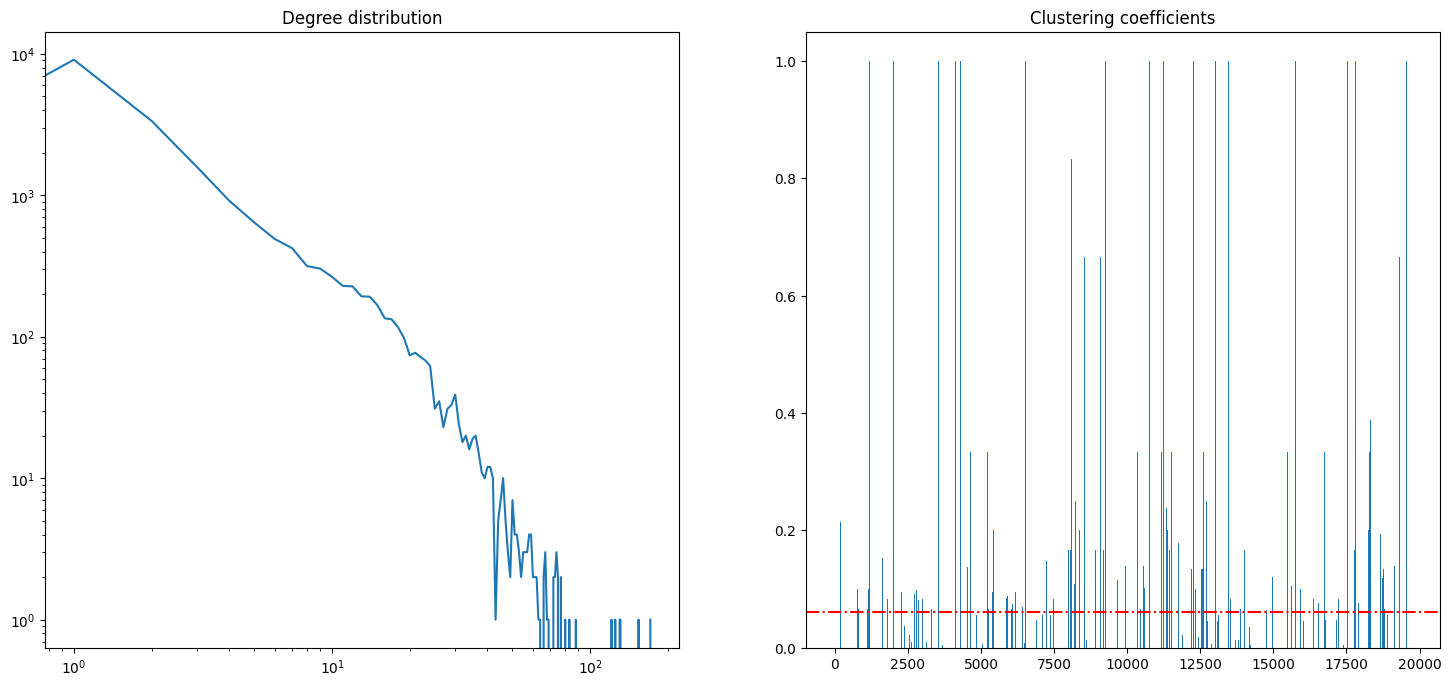

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].plot(nx.degree_histogram(PubMed_graph))
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].title.set_text('Degree distribution')

axs[1].bar(list(nx.clustering(PubMed_graph).keys()), list(nx.clustering(PubMed_graph).values()))
axs[1].axhline(y = nx.average_clustering(PubMed_graph), color = 'r', linestyle = '-.') 
axs[1].title.set_text('Clustering coefficients')

Indeed:

In [12]:
print(f'The average clustering coefficient of the network is {nx.average_clustering(PubMed_graph)}')

The average clustering coefficient of the network is 0.060175209437523615


If we consider the citation $(p_A, p_B)$ to be directed, we can retrieve as follows the average number of citations:

In [13]:
citations = {v.item():0 for v in nodes}

for edge in edges:
    citations[edge[0]] += 1
    #citations[edge[1]] += 1

In [14]:
print(f'The average number of citations is {np.mean(list(citations.values()))}')

The average number of citations is 4.496018664096972


#### Exploratory data analysis of the features of the nodes

On each node we have:
+ A TFIDF embedding of the abstract of the paper;
+ An integer encoding for the category of the paper.

In [15]:
nodes_TFIDF = data.x
nodes_classes = data.y

In [16]:
nodes_TFIDF.shape

torch.Size([19717, 500])

This TFIDF matrix doesn't allow for a feature-basis analysis or a document-basis one. Let's anyway plot some of the TFIDF features estimated density across the documents: given the high sparsity in this model, we expect to see that most of the documents have a zero TFIDF score in such features. 

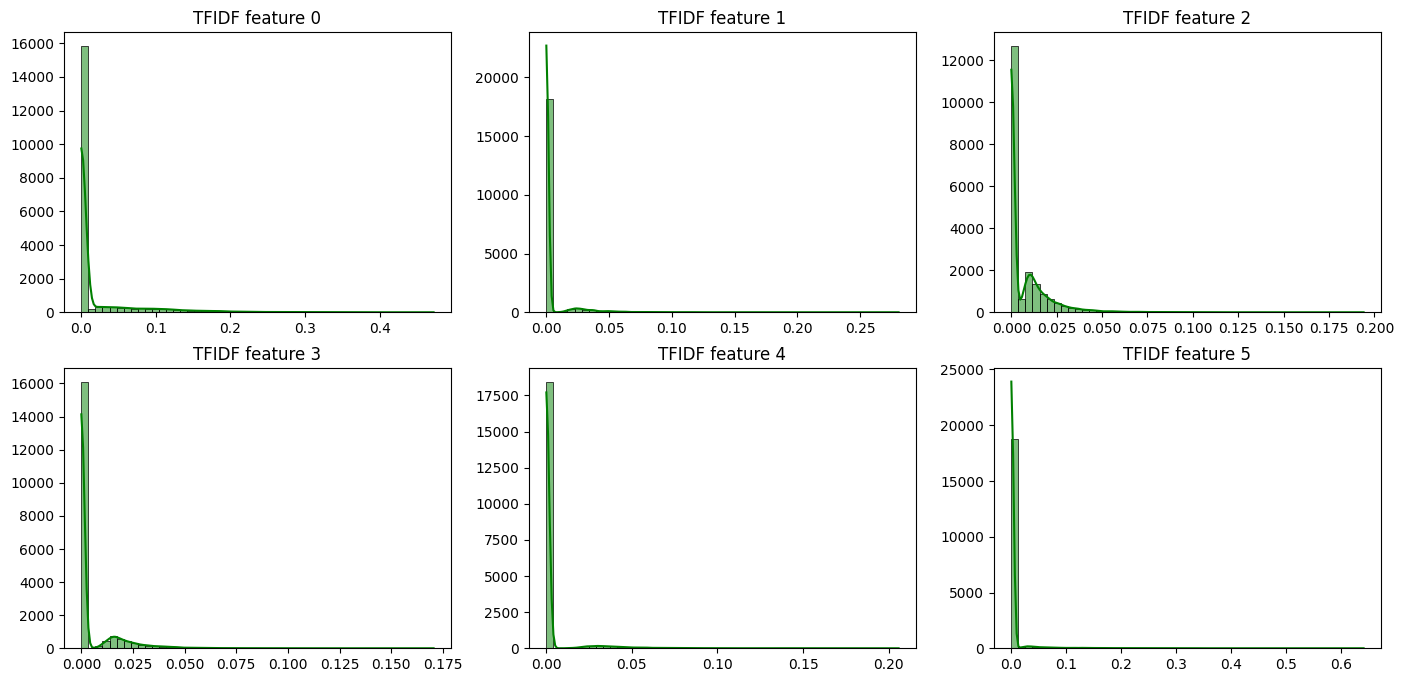

In [17]:
fig, axs = plt.subplots(2,3, figsize=(17,8))
for i in range(6):

    row = i // 3
    col = i % 3
    
    sns.histplot(nodes_TFIDF[:,i], kde=True, color='green', bins=50, ax=axs[row,col])
    axs[row,col].title.set_text(f'TFIDF feature {i}')
    axs[row,col].set_ylabel('')
    
plt.show()

Let's perform a simple dimensionality reduction pipeline to provide a visualization and eventually see if clusters naturally arises in the documents. 

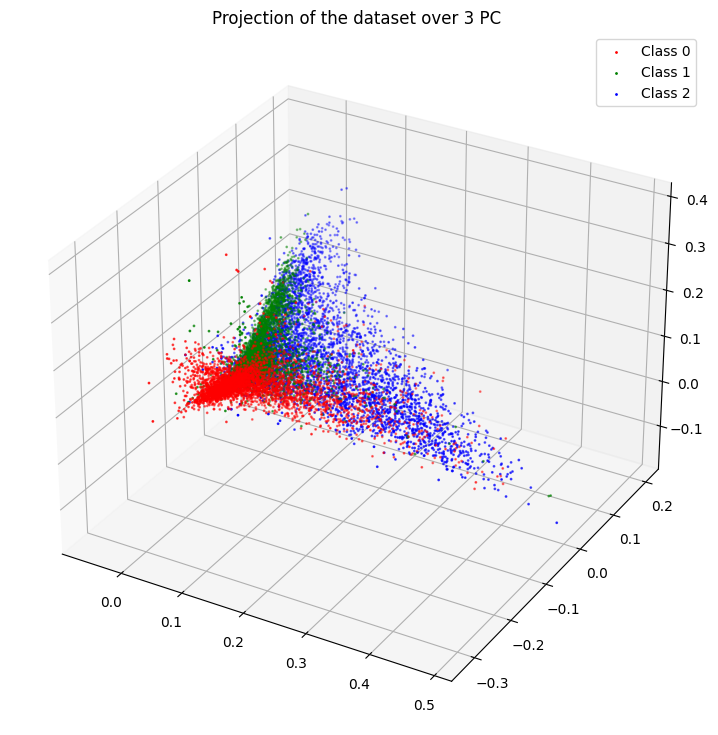

In [18]:
torch.manual_seed(0)

U, S, V = torch.pca_lowrank(nodes_TFIDF, q = 3)
projected = torch.matmul(nodes_TFIDF, V)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')

colors = ['r','g','b']

for i, color in enumerate(colors):
    ax.scatter(projected[nodes_classes == i, 0], projected[nodes_classes == i, 1], projected[nodes_classes == i, 2],
                color=color,
                s = 1,
                label=f'Class {i}')
    ax.legend()
    ax.title.set_text('Projection of the dataset over 3 PC')

Let's also have a look to the number of classes and their distribution: 

In [19]:
torch.unique(nodes_classes)

tensor([0, 1, 2])

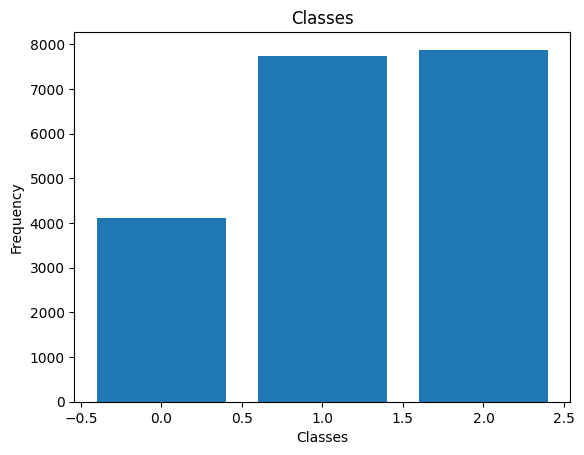

In [20]:
class_counts = Counter(nodes_classes.tolist())

# Extract classes and their frequencies
class_labels = list(class_counts.keys())
class_frequencies = list(class_counts.values())

# Plot bar plot
plt.bar(class_labels, class_frequencies)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Classes')
plt.show()

As we can see, the first class is way less represented, resulting over all in a quite unbalanced dataset that may result in an irreducible error. 

Lastly, let's assess the relation between the TFIDF features and the class: we will have a look to both the correlation coefficients and the weights of a logistic regression. Being a linear model, logistic regression is natively highly explainable just looking at the retrieved parameters.  

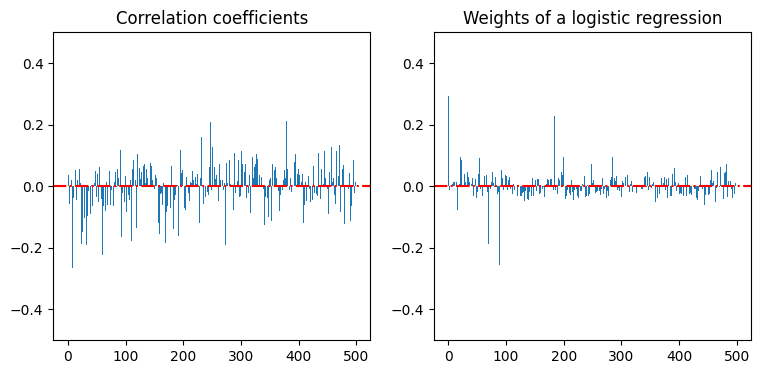

In [21]:
np.random.seed(42)

# Retrieve correlation coefficients

correlation_values = np.zeros(nodes_TFIDF.numpy().shape[1])

for i in range(nodes_TFIDF.shape[1]):
    column = nodes_TFIDF[:, i]
    correlation_values[i] = np.corrcoef(column, nodes_classes)[0,1]

# Retrieve weights of a logistic regression

model = LogisticRegression(max_iter=1000)
model.fit(nodes_TFIDF.numpy(), nodes_classes.numpy())

weights = model.coef_[0]
weights = weights/np.sum(weights)

# Plot the two retrieved sets 

fig, axs = plt.subplots(1,2,figsize=(9,4))

axs[0].set_ylim([-0.5,0.5])
axs[0].bar(np.arange(0,500),correlation_values)
axs[0].axhline(y = np.mean(correlation_values), color = 'r', linestyle = '-.')
axs[0].title.set_text('Correlation coefficients')

axs[1].set_ylim([-0.5,0.5])
axs[1].bar(np.arange(0,500),weights)
axs[1].axhline(y = np.mean(weights), color = 'r', linestyle = '-.')
axs[1].title.set_text('Weights of a logistic regression')

There is mostlty a negative correlation, but we would not expect a relation between such features and a class to be predictable through linear relation: actually, on average there's no correlation at all. 

Looking at the (normalized) weights of the logistic regression, we can say that some features are more relevant than others: however, we'll stop here and finally go through the core implementation of this problem.

## Graph neural networks for node classification 

### Graph convolutional layers 

The main idea of a graph convolutional network (GCN), similarly to classical convolutional neural network (CNN), is to leverage localty in processing the input: this lead to the message passing aggregation among the neighboors. Moreover, what in CNN was the property of translational invariance, in GCN becomes permutational invariance: to do so, we define a shift operator $S$ properly encoding for the sparsity pattern of the graph. 

The simplest way to define a GCN is the stack of many graph convolutional layers, based on finite impulse response filters over graphs: this is intimately linked to graph spectral theory, since these filters as defined have an equivalent in the Fourier domain embedded in the shift operator. Recursively, we can write: 

$$ X^{(l)} = \sigma\{\sum_{k=0}^{K-1} S^kX^{(l-1)}H_k\} $$

where 
+ $\sigma$ is the usual nonlinearity function between subsequent layers;
+ $S$ is the shift operator;
+ $X^{(l-1)}$ is the input matrix of signals over the nodes for the subsequent layer $X^{(l)}$: $X^0$ is the original input data matrix;
+ $H$ is the tensor of parameters;
+ $K$ is the considered power for the shift operator, i.e. the number of hops in a single aggregation. 

Up to this definition, this architecture is task agnostic: in order to perform node classification, we add a softmax head to the top layer: equivalently, we leverage the fact that softmax can be implemented either as a layer or within the loss optimization routine. 
In the end, our model will look like:

$$ X^{(l)} = \sigma\{\sum_{k=0}^{K-1} S^kX^{(l-1)}H_k\}, \ \ \ l = 1,..., L  $$
$$ \mathrm{softmax}(X_u^{(L)}, y_u) = \sum_{i=1}^C y_u[i] \frac{\exp{(X_u^{(L)T}w_i)}}{\sum_{j=1}^C exp{(X_u^{(L)T}w_j)}}$$

### Baselines: GCN, SAGE, GAT

My architecture is based on a 2 layers Graph Neural Networ: evidences show that deeper models have worse performances. I used ReLU as activation function and made the model more robust with a classic dropout. As it was firstly suggested in the original SAGE paper, I also added a skip connection before the softmax head, concatenating the output of the message-passing layer with the original input. 

I experimented with the standard convolutional layer ```GCNConv``` implemented as a module in ```torch_geometric.nn```, as well as message passing variants ```SAGEConv``` and ```GATConv```: the three models are implemented in the module ```models_utils.py```.
The ```train_utils.py``` contains a simple training loop implementation with a call for early stopping. 

In [6]:
# GCN model instantiation

model_1 = GCNNet(
    in_channels=dataset.num_features,
    hidden_channels=256,
    out_channels=16,
    num_classes=dataset.num_classes,
    skip=True
    ).float()

optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=0.01, weight_decay=3e-4)
model_1

GCNNet(
  (conv1): GCNConv(500, 256)
  (conv2): GCNConv(256, 16)
  (fc): Linear(in_features=516, out_features=3, bias=True)
)

In [7]:
# SAGE model instantiation

model_2 = SAGENet(
    in_channels=dataset.num_features,
    hidden_channels=256,
    out_channels=16,
    num_classes=dataset.num_classes,
    skip=True
    ).float()

optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=0.01, weight_decay=3e-4)

model_2

SAGENet(
  (conv1): SAGEConv(500, 256, aggr=mean)
  (conv2): SAGEConv(256, 16, aggr=mean)
  (fc): Linear(in_features=516, out_features=3, bias=True)
)

In [8]:
# GAT model instantiation

model_3 = GATNet(
    heads = 3,
    in_channels=dataset.num_features,
    hidden_channels=256,
    out_channels=16,
    num_classes=dataset.num_classes,
    skip=True
    ).float()

optimizer_3 = torch.optim.Adam(model_3.parameters(), lr=0.01, weight_decay=3e-4)

model_3

GATNet(
  (conv1): GATConv(500, 256, heads=3)
  (conv2): GATConv(768, 16, heads=1)
  (fc): Linear(in_features=516, out_features=3, bias=True)
)

In [9]:
GCN_train_loss, GCN_val_acc = node_classification_train_loop(model_1, 
                                                             optimizer_1, 
                                                             data,
                                                             100,
                                                             20,
                                                             'checkpoint1.pt')

Epoch: 5     | Training Loss: 1.0367 | Validation accuracy: 0.4340
Epoch: 10    | Training Loss: 0.9230 | Validation accuracy: 0.6600
Epoch: 15    | Training Loss: 0.7680 | Validation accuracy: 0.7080
Epoch: 20    | Training Loss: 0.6123 | Validation accuracy: 0.8420
Epoch: 25    | Training Loss: 0.5135 | Validation accuracy: 0.8760
Epoch: 30    | Training Loss: 0.4599 | Validation accuracy: 0.8880
Epoch: 35    | Training Loss: 0.4232 | Validation accuracy: 0.9020
Epoch: 40    | Training Loss: 0.4000 | Validation accuracy: 0.9000
Epoch: 45    | Training Loss: 0.3737 | Validation accuracy: 0.8940
Epoch: 50    | Training Loss: 0.3725 | Validation accuracy: 0.9000
Epoch: 55    | Training Loss: 0.3617 | Validation accuracy: 0.8900
Epoch: 60    | Training Loss: 0.3553 | Validation accuracy: 0.9080
Epoch: 65    | Training Loss: 0.3516 | Validation accuracy: 0.9000
Epoch: 70    | Training Loss: 0.3508 | Validation accuracy: 0.9060
Early stopping at epoch 71 with best validation accuracy: 0.90

In [10]:
SAGE_train_loss, SAGE_val_acc = node_classification_train_loop(model_2, 
                                                               optimizer_2, 
                                                               data,
                                                               200,
                                                               10,
                                                               'checkpoint2.pt')

Epoch: 5     | Training Loss: 0.9840 | Validation accuracy: 0.5020
Epoch: 10    | Training Loss: 0.8160 | Validation accuracy: 0.6400
Epoch: 15    | Training Loss: 0.6741 | Validation accuracy: 0.8280
Epoch: 20    | Training Loss: 0.5221 | Validation accuracy: 0.8780
Epoch: 25    | Training Loss: 0.4430 | Validation accuracy: 0.8880
Epoch: 30    | Training Loss: 0.4085 | Validation accuracy: 0.9020
Epoch: 35    | Training Loss: 0.3842 | Validation accuracy: 0.9040
Epoch: 40    | Training Loss: 0.3689 | Validation accuracy: 0.9020
Epoch: 45    | Training Loss: 0.3583 | Validation accuracy: 0.9100
Epoch: 50    | Training Loss: 0.3494 | Validation accuracy: 0.9080
Early stopping at epoch 51 with best validation accuracy: 0.9200
Calling back best model...


In [11]:
GAT_train_loss, GAT_val_acc = node_classification_train_loop(model_3, 
                                                             optimizer_3, 
                                                             data,
                                                             200,
                                                             10,
                                                             'checkpoint3.pt')

Epoch: 5     | Training Loss: 1.0040 | Validation accuracy: 0.4480
Epoch: 10    | Training Loss: 0.8071 | Validation accuracy: 0.7180
Epoch: 15    | Training Loss: 0.5972 | Validation accuracy: 0.8440
Epoch: 20    | Training Loss: 0.5126 | Validation accuracy: 0.8740
Epoch: 25    | Training Loss: 0.4586 | Validation accuracy: 0.8720
Epoch: 30    | Training Loss: 0.4332 | Validation accuracy: 0.8980
Epoch: 35    | Training Loss: 0.4058 | Validation accuracy: 0.9060
Epoch: 40    | Training Loss: 0.3792 | Validation accuracy: 0.8980
Epoch: 45    | Training Loss: 0.3695 | Validation accuracy: 0.9000
Early stopping at epoch 45 with best validation accuracy: 0.9060
Calling back best model...


Let's test the models: 

In [20]:
GCN_metrics = node_classification_test(model_1, data)
SAGE_metrics = node_classification_test(model_2, data)
GAT_metrics = node_classification_test(model_3, data)

GCN_acc = GCN_metrics['Accuracy']
SAGE_acc = SAGE_metrics['Accuracy']
GAT_acc = GAT_metrics['Accuracy']

print(f'GCN test accuracy:  {GCN_acc:.04f}')
print(f'SAGE test accuracy: {SAGE_acc:.04f}')
print(f'GAT test accuracy:  {GAT_acc:.04f}')

GCN test accuracy:  0.8790
SAGE test accuracy: 0.8780
GAT test accuracy:  0.8610


Let's have a look at a table to find out the best model with respect to each of the metrics we considered (metrics are micro-averaged with respect to each class): 

In [21]:
metrics_ = [GCN_metrics, SAGE_metrics, GAT_metrics]

accs = [metrics['Accuracy'] for metrics in metrics_]
prec = [metrics['Precision'] for metrics in metrics_]
f1sc = [metrics['F1 Score'] for metrics in metrics_]
recs = [metrics['Recall'] for metrics in metrics_]

df = pd.DataFrame({
    'Accuracy':accs,
    'Precision':prec,
    'F1 Score':f1sc,
    'Recall':recs
})

df.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["GCN", "SAGE", "GAT"], axis=0)

,ACCURACY,PRECISION,F1 SCORE,RECALL
GCN,"0,879","0,875","0,870","0,866"
SAGE,"0,878","0,872","0,872","0,873"
GAT,"0,861","0,852","0,850","0,848"


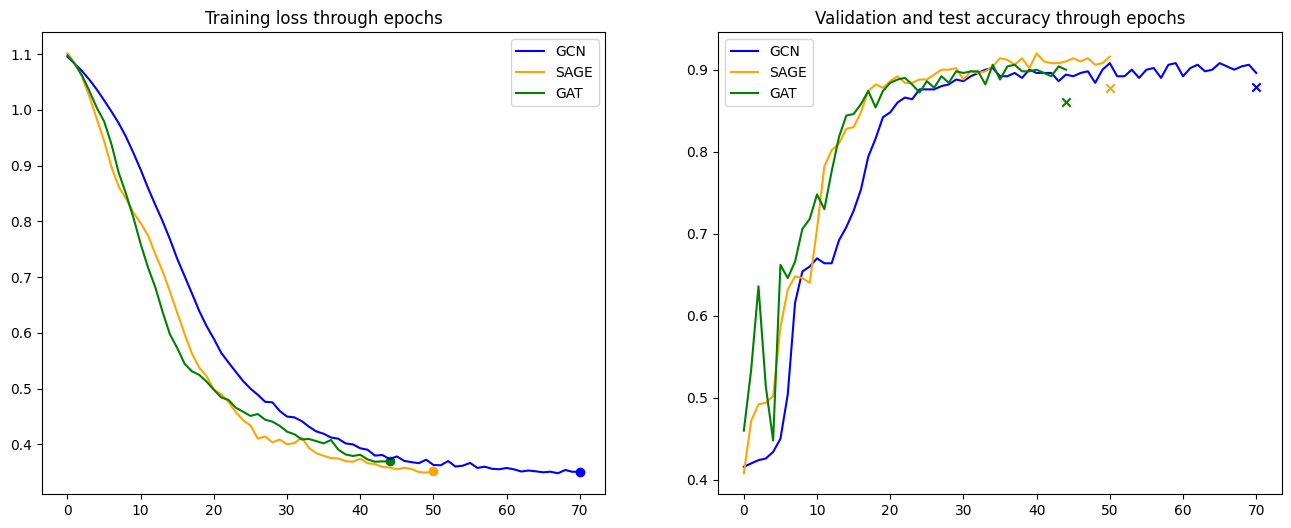

In [23]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

axs[0].plot(GCN_train_loss, label='GCN', color='blue')
axs[0].plot(SAGE_train_loss, label='SAGE', color='orange')
axs[0].plot(GAT_train_loss, label='GAT', color='green')
axs[0].scatter(len(GCN_train_loss) - 1, GCN_train_loss[-1], color='blue', marker='o')
axs[0].scatter(len(SAGE_train_loss) - 1, SAGE_train_loss[-1], color='orange', marker='o')
axs[0].scatter(len(GAT_train_loss) - 1, GAT_train_loss[-1], color='green', marker='o')
axs[0].title.set_text('Training loss through epochs')
axs[0].legend()

axs[1].plot(GCN_val_acc, label='GCN', color='blue')
axs[1].plot(SAGE_val_acc, label='SAGE', color='orange')
axs[1].plot(GAT_val_acc, label='GAT', color='green')
axs[1].scatter(len(GCN_val_acc) - 1, GCN_acc, color='blue', marker='x')
axs[1].scatter(len(SAGE_val_acc) - 1, SAGE_acc, color='orange', marker='x')
axs[1].scatter(len(GAT_val_acc) - 1, GAT_acc, color='green', marker='x')
axs[1].title.set_text('Validation and test accuracy through epochs')
axs[1].legend()

## Graph neural networks for link predictions

The idea for link prediction is to learn the node embedding as the output of a message passing network and then define a binary classification task whose training loop would be based on the following empirical loss function: 

$$\mathcal{L} = - \sum_{u \sim v \in \mathcal{D}} (y_{u\sim v} \log(\hat{y}_{u \sim v}) + (1 - y_{u \sim v}) \log(1 - \hat{y}_{u \sim v})) $$

where we basically compare the binary cross entropy between the ground truth adjacency matrix and reconstructed one. 

So the architecture would result from the chaining of two distinct models: 
+ An encoder based on a GNN computing node-level embedding representations;
+ A decoder based on a dot product similarity between the learned node embeddings. 


In order to do so, we need to define a proper splitting for the edge set in a training set, a validation set and a test set following the usual proportion 

$0.8:0.1:0.1$.

We do the same for edges that are not present: they define the negative graph and are fundamental to build a robust model. This routine will be handled by ```torch_geometric.utils``` built in ```negative_sampling```.

In [30]:
nodes = torch.arange(0, data.x.shape[0])
edges = data.edge_index

pos_edges_train, pos_edges_val, pos_edges_test = edge_splitting(edges, nodes)
neg_edges_train, neg_edges_val, neg_edges_test = edge_splitting(edges, nodes, negative=True)

Now we first instantiate a model that will work as our encoder-decoder: it is a GCN with a decoder on top computing dot product of node embeddings and wrapping them in a sigmoid.  

In [31]:
hidden_channels = 128
embedding_dimension = 16

model = EncoderDecoder(
    in_channels=dataset.num_features,
    hidden_channels=hidden_channels,
    out_channels=embedding_dimension
    ).float()

model

EncoderDecoder(
  (conv1): GCNConv(500, 128)
  (conv2): GCNConv(128, 16)
)

Finally we can start our training loop. 

In [32]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

epochs = 40

In [33]:
train_loss, val_auc = encoder_decoder_train_loop(epochs,
                                                 model,
                                                 optimizer,
                                                 criterion,
                                                 data,
                                                 pos_edges_train,
                                                 neg_edges_train,
                                                 pos_edges_val,
                                                 neg_edges_val)

Epoch: 0     | Training Loss: 0.6928 | AUC-ROC Score: 0.9058
Epoch: 5     | Training Loss: 0.6272 | AUC-ROC Score: 0.8863
Epoch: 10    | Training Loss: 0.5733 | AUC-ROC Score: 0.9234
Epoch: 15    | Training Loss: 0.5408 | AUC-ROC Score: 0.8699
Epoch: 20    | Training Loss: 0.5160 | AUC-ROC Score: 0.9081
Epoch: 25    | Training Loss: 0.4845 | AUC-ROC Score: 0.9418
Epoch: 30    | Training Loss: 0.4843 | AUC-ROC Score: 0.9373
Epoch: 35    | Training Loss: 0.4702 | AUC-ROC Score: 0.9496


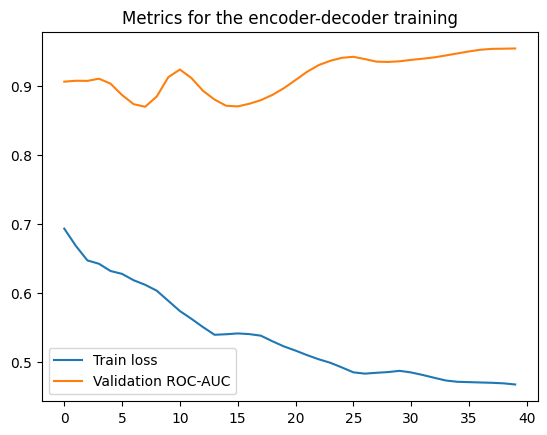

In [34]:
plt.plot(train_loss, label = 'Train loss')
plt.plot(val_auc, label = 'Validation ROC-AUC')
plt.title('Metrics for the encoder-decoder training')
plt.legend()

Let's test the model: 

In [35]:
test_encoder_decoder(model,
                     data,
                     pos_edges_test,
                     neg_edges_test)

Test AUC-ROC Score: 0.9548


____________________